In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Familiarize yourself with the dataset

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv('./data/housing.csv',header=None,delimiter=r"\s+",names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Find insights

## Question 1 
Is there a significant difference in the median value of houses bounded by the Charles river or not?


In [5]:
df1 = df[['CHAS','MEDV']]
df1.head()

,CHAS,MEDV
0,0,24.0
1,0,21.6
2,0,34.7
3,0,33.4
4,0,36.2


First, we compared the **mean value** of owner-occupied homes in the Charles River area with homes not in that area.

In [6]:
df1.groupby('CHAS').mean()

,MEDV
CHAS,
0,22.093843
1,28.440000


In [7]:
df1.groupby('CHAS').median().to_csv('output.csv')

We can see:
1. The **mean** value of the price of **tract-bounds river home** is ***GREATER*** than $\frac{28.4-22.09}{22.09} \approx 28\%$  of the mean price of the other.
2.  The **median** value of the price of **tract-bounds river home** is ***GREATER*** than $\frac{23.3-20.9}{20.9} \approx 11.5\%$  of the median price of the other.

We can further check by look at the box plot:

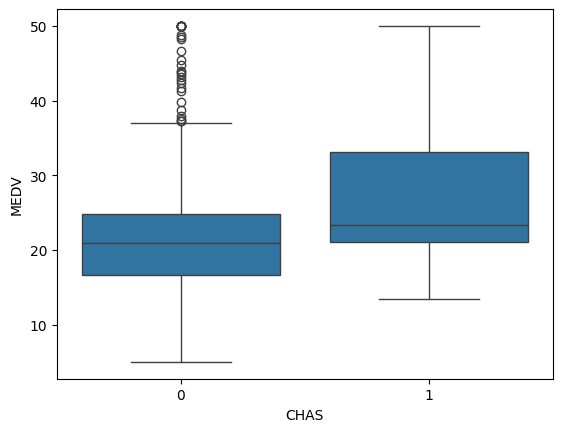

In [8]:
sns.boxplot(x='CHAS',y='MEDV',data=df1)
plt.show()

The box plot shown that the price of `CHAS=1` seems to be bigger than `CHAS=0`. 

**Conclusion**: There is a significant difference in the median value of houses bounded by the Charles river or not (2.400$ ~ 11%)

## Question 2
Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal
from IPython.display import display

In [10]:
df1 = df[['AGE','MEDV']]
df1.head()

,AGE,MEDV
0,65.2,24.0
1,78.9,21.6
2,61.1,34.7
3,45.8,33.4
4,54.2,36.2


In [11]:
df1.groupby('AGE').mean()

,MEDV
AGE,
2.9,26.600000
6.0,24.100000
6.2,23.400000
6.5,24.700000
6.6,24.750000
...,...
98.8,14.500000
98.9,13.066667
99.1,10.900000


In [12]:
df1.groupby('AGE').median().to_csv('output.csv')

In [13]:
# Filter data with necessary columns
df2 = df[['AGE', 'MEDV']]
# Group AGE values ​​into larger groups to reduce the number of boxplots
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
df2['AGE_GROUP'] = pd.cut(df2['AGE'], bins=bins, labels=labels, right=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14876\271909555.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['AGE_GROUP'] = pd.cut(df2['AGE'], bins=bins, labels=labels, right=False)


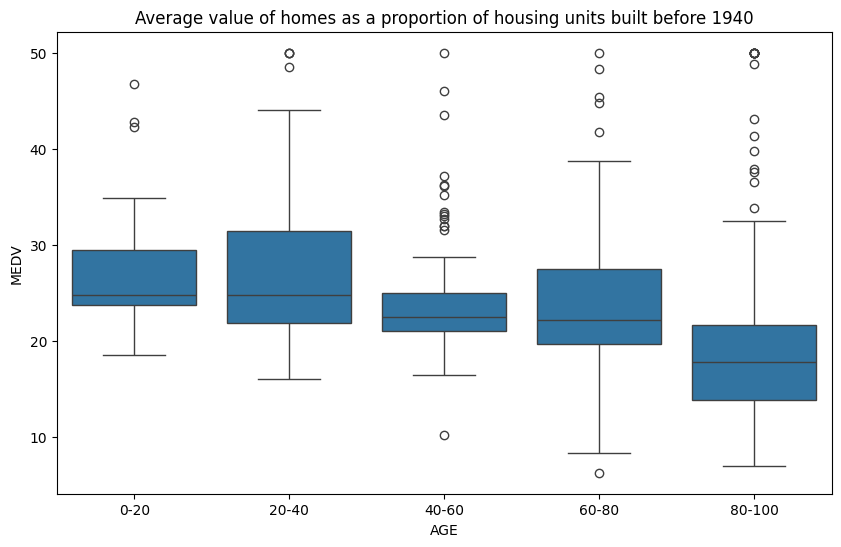

In [14]:
# Create a boxplot to visualize the distribution of MEDV by AGE group
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=df2)
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.title('Average value of homes as a proportion of housing units built before 1940')
plt.show()

## Question 3
Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

In [15]:
df3 = df[['NOX','INDUS']]
df3.head()

,NOX,INDUS
0,0.538,2.31
1,0.469,7.07
2,0.469,7.07
3,0.458,2.18
4,0.458,2.18


First, we check the **correlation** between `NOX` and `INDUS`.

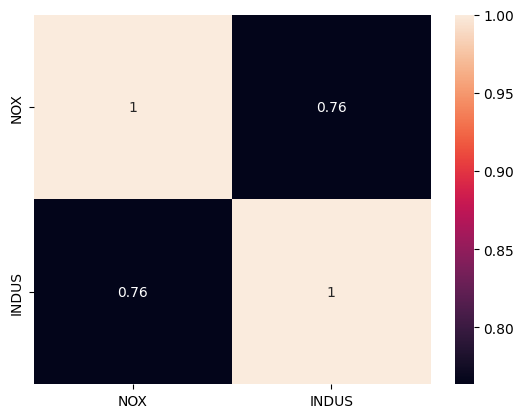

In [17]:
nox_indus = df3.corr()
sns.heatmap(nox_indus,annot=True)
plt.show()

The `corr = 0.76`  indicates a strong positive relationship between NO concentrations and the proportion of non-retail business acres per town.

This means that as the proportion of non-retail business acres per town increases, the Nitric oxide concentrations tend to increase as well.

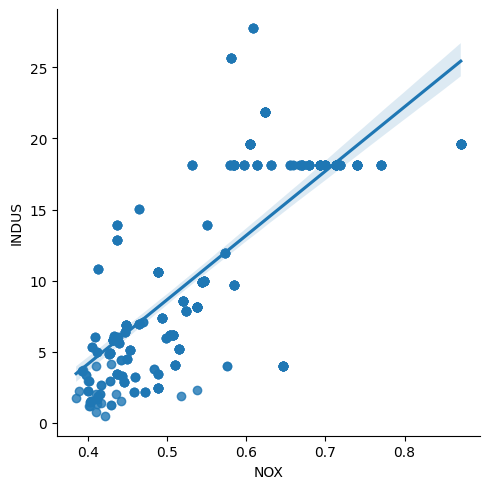

In [18]:
sns.lmplot(x='NOX',y='INDUS',data=df3)
plt.show()

## Question 4